# Analyse des temps de parole (Work in progress)

In [1]:
#import bibliotheque de fonction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fonction.perso_stats as perso_stats

In [2]:
#import donnée
eu2024 = pd.read_csv('donnee_contruite/temps_paroles_EU2024.csv')

Vue générale :<br>
20 % des interventions sur toute les chaines font 80% des temps de paroles.<br>
Il y a un indice de gini de 0.83 ce qui correspond à une grande inégalité du temps de paroles<br>

indice de gini general : 0.8285476266046288


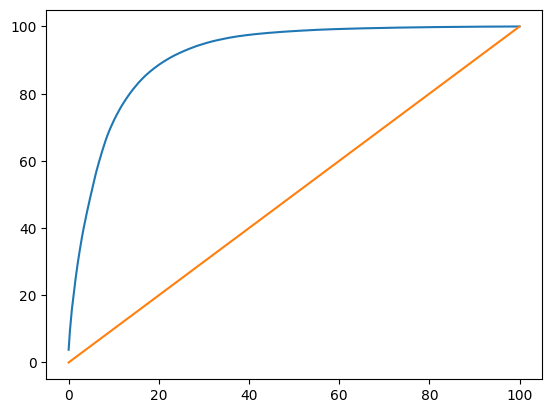

In [3]:
fig,ax =plt.subplots()
print('indice de gini general :',perso_stats.courbe_Lorentz(plt_ax=ax,df=eu2024,colonne='Durée en seconde'))


In [4]:
liste_media = list(eu2024['Nom du media'].unique())
liste_type_media = list(eu2024['Type de media'].unique())

indice de gini radio: 0.8249168926550162
indice de gini TV info continue: 0.8173023647694685
indice de gini TV généraliste: 0.7906042948492276


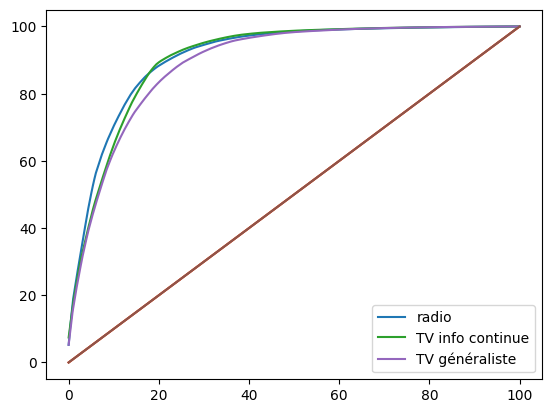

In [5]:
fig,ax =plt.subplots()
for type in liste_type_media:
    data=eu2024[eu2024['Type de media']==type]
    print('indice de gini '+type+':',perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=type))
    ax.legend()


Les radios fournissent en général plus d'égalité du temps de parole.<br>
Enfin juste un peu<br>

In [6]:
liste_media

['BFMBusiness',
 'BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 'RMCDecouverte',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'France info TV']

RMC decouverte et BFM business n ont pas de temps de paroles, division par 0 je dois les enlever

indice de gini BFMTV: 0.8601917220592921
indice de gini C8: 0.8036229011171694
indice de gini Cnews: 0.8624288425047442
indice de gini Euronews: 0.9255516469459552
indice de gini Europe1: 0.8604447728282008
indice de gini France2: 0.8244843451913366
indice de gini France24: 0.864777449128684
indice de gini France3: 0.5799145588933343
indice de gini France5: 0.9043338899082249
indice de gini FranceCulture: 0.8475068306010933
indice de gini FranceInfo: 0.8595962504190258
indice de gini FranceInter: 0.8436978617317101
indice de gini LCI: 0.8830069116673407
indice de gini M6: 0.652645861601086
indice de gini RFI: 0.7633268900343643
indice de gini RMC-Story: 0.7735420245938228
indice de gini RMC: 0.8625338753387536
indice de gini RTL: 0.8593989360220595
indice de gini RadioClassique: 0.6936475111408846
indice de gini SudRadio: 0.7776475427992784
indice de gini TF1: 0.766818545366373
indice de gini TMC: 0.7926364967575482
indice de gini TV5Monde: 0.7933761739990117
indice de gini franceinfo_

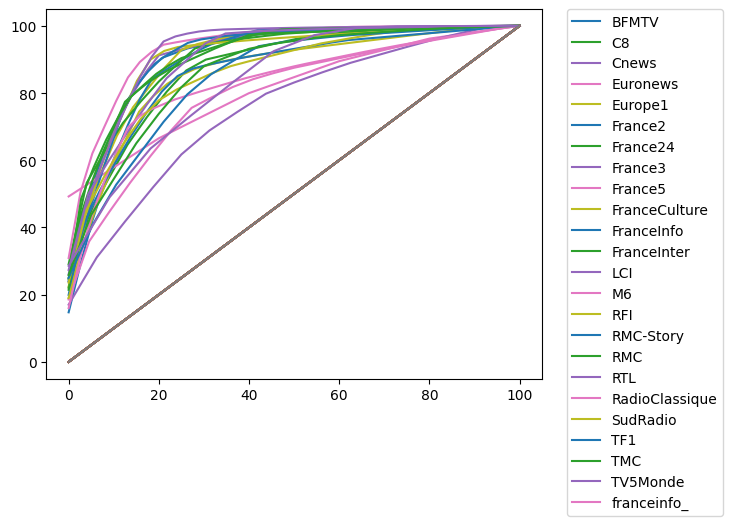

In [7]:
fig,ax =plt.subplots()
liste_media=[#'BFMBusiness',
 'BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 #'RMCDecouverte',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'franceinfo_'
 ]
 
dico_gini_media = {}
for media in liste_media:
    data=eu2024[eu2024['Nom du media']==media]
    indice = perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=media)
    print('indice de gini '+media+':',indice)
    dico_gini_media[media] = float(indice)
    ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

# Classement des medias du moins égalitaire au plus égalitaire selon l indice de Gini :

In [8]:
for key in sorted(dico_gini_media, key = dico_gini_media.get, reverse=True) :
    print (key,':', dico_gini_media[key])

Euronews : 0.9255516469459552
France5 : 0.9043338899082249
LCI : 0.8830069116673407
France24 : 0.864777449128684
RMC : 0.8625338753387536
Cnews : 0.8624288425047442
Europe1 : 0.8604447728282008
BFMTV : 0.8601917220592921
FranceInfo : 0.8595962504190258
RTL : 0.8593989360220595
FranceCulture : 0.8475068306010933
FranceInter : 0.8436978617317101
France2 : 0.8244843451913366
C8 : 0.8036229011171694
TV5Monde : 0.7933761739990117
TMC : 0.7926364967575482
SudRadio : 0.7776475427992784
RMC-Story : 0.7735420245938228
TF1 : 0.766818545366373
RFI : 0.7633268900343643
RadioClassique : 0.6936475111408846
M6 : 0.652645861601086
France3 : 0.5799145588933343
franceinfo_ : -1.0


Cette liste est concu avec une regle : chaque liste doit avoir le meme temps de parole. Ainsi une chaine qui lutte contre les autres en mettant en avant une liste peut representative va donc etre classé non égalitaire.<br>
travail en cours : faire des couleurs pour classé les partie en fonction de leurs couleur politique.<br>
classé les media en fonction de leur preference politique<br>
faire un rendement voie/temps d'antenne pour voir si il y a un influence du temps d'antenne sur les voies<br>


Vue générale :

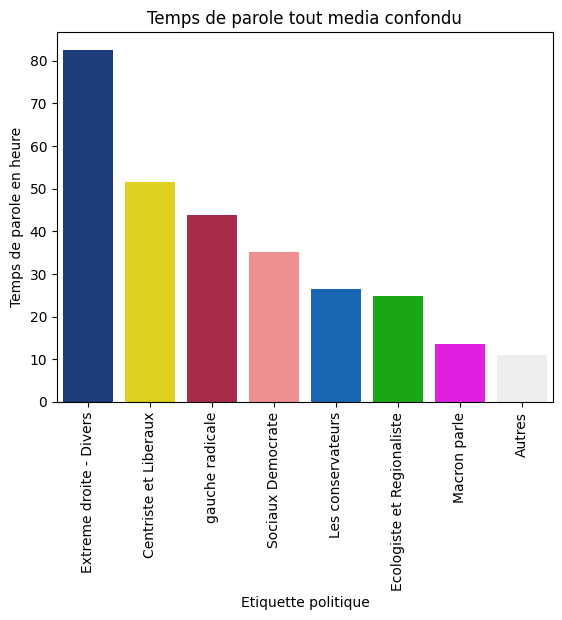

In [9]:
# preparation data
eu2024_couleur_gen = eu2024.groupby(by='Couleur').agg({'Durée en seconde':'sum'}).reset_index()
eu2024_couleur_gen["Temps de parole en heure"] = eu2024_couleur_gen['Durée en seconde']/3600
eu2024_couleur_gen = eu2024_couleur_gen.sort_values(by='Temps de parole en heure',ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs
colors = ["#0D378A", "#ffeb00","#bb1840","#ff8080","#0066cc","#00c000","#FF00FF","#eeeeee"]
sns.set_palette(sns.color_palette(colors))

# figure 
fig,ax =plt.subplots()
sns.barplot(data=eu2024_couleur_gen,x='Couleur',y='Temps de parole en heure',hue='Couleur')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show()


Pour ces élections, l'extreme-droite à eu plus de 60 heures de temps de paroles.<br>
Si on suis la logique de l'arcom, le RN étant en tête des sondages, c'est légal.<br>
https://www.lesechos.fr/elections/europeennes/sondage-europeennes-2024-tous-les-resultats-du-barometre-eurotrack-2090451 <br>
<br>
Par contre, il faut aussi prendre ne compte les résultats des précédentes élections.<br>
https://fr.wikipedia.org/wiki/%C3%89lections_europ%C3%A9ennes_de_2019_en_France <br>
<br>


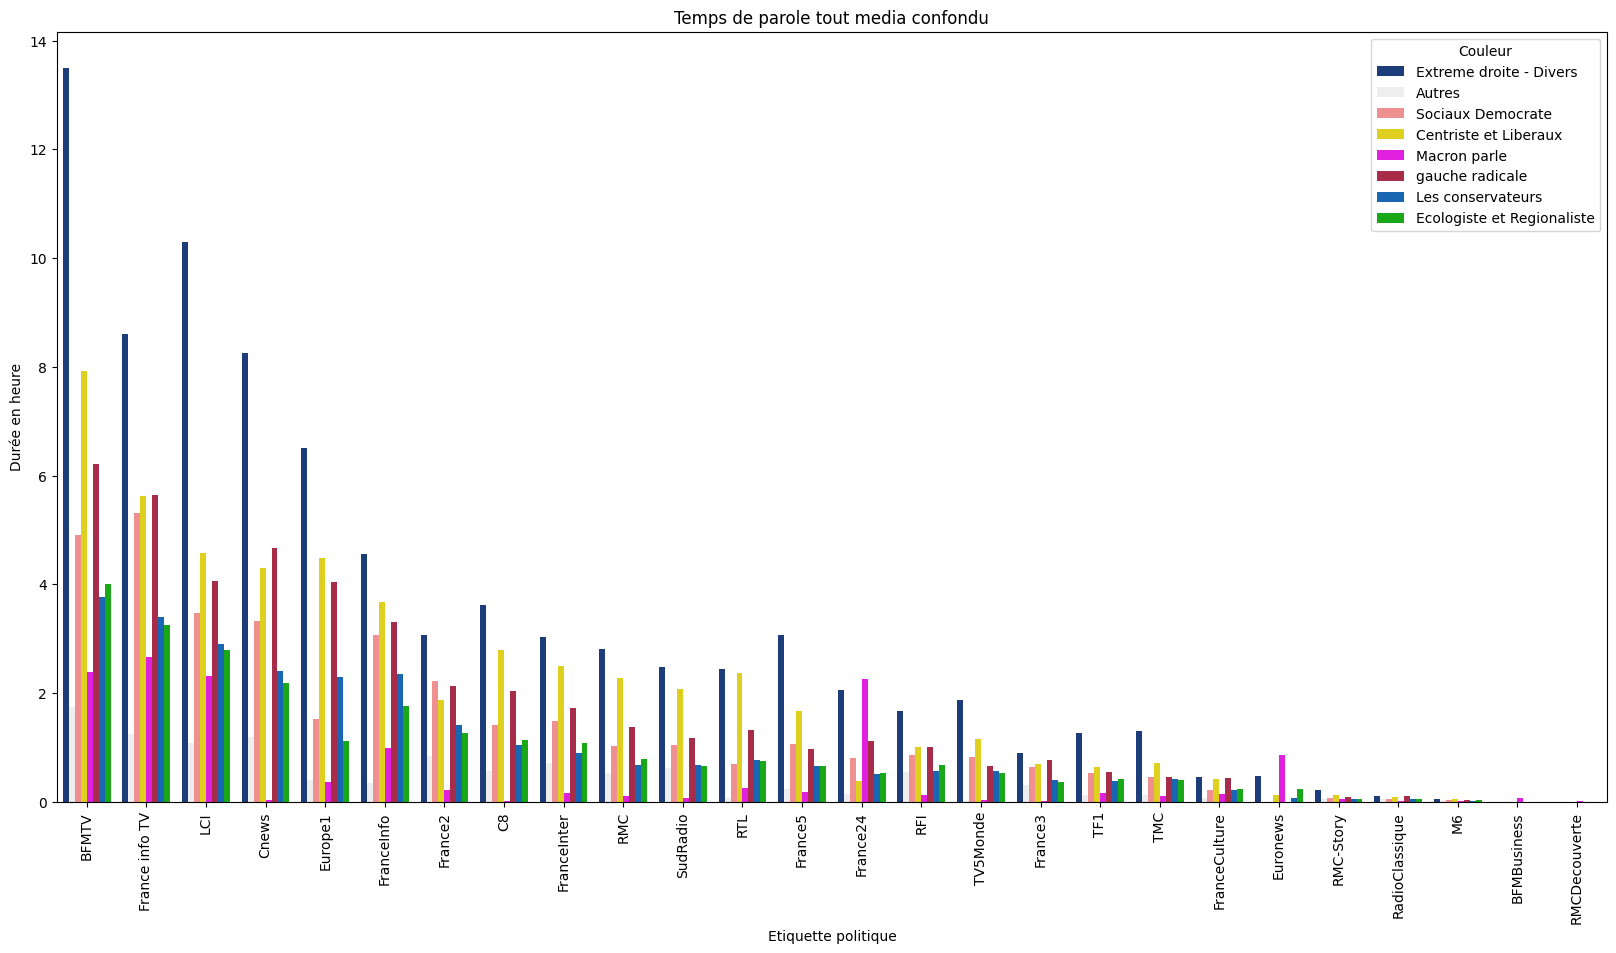

In [10]:
# preparation data
eu2024_sort = eu2024.sort_values(by="Temps total",ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs
colors = {"Extreme droite - Divers":"#0D378A"
        ,"Centriste et Liberaux":"#ffeb00"
        ,"gauche radicale":"#bb1840"
        ,"Sociaux Democrate":"#ff8080"
        ,"Les conservateurs":"#0066cc"
        ,"Ecologiste et Regionaliste":"#00c000"
        ,"Macron parle":"#FF00FF"
        ,"Autres":"#eeeeee"}

# figure 
fig,ax =plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=eu2024_sort,x='Nom du media',y='Durée en heure',hue='Couleur',palette=colors,errorbar=None,estimator='sum')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show()

Alors il faut aussi prendre en compte l'audimat des chaines. en 2022 les chaines de télévision TF1, France2 et france 3 represente 30 % de l'audimat. Elle on donc une plus grande ecoute que les autres chaines.<br>
https://fr.wikipedia.org/wiki/Audiences_de_la_t%C3%A9l%C3%A9vision_fran%C3%A7aise <br>



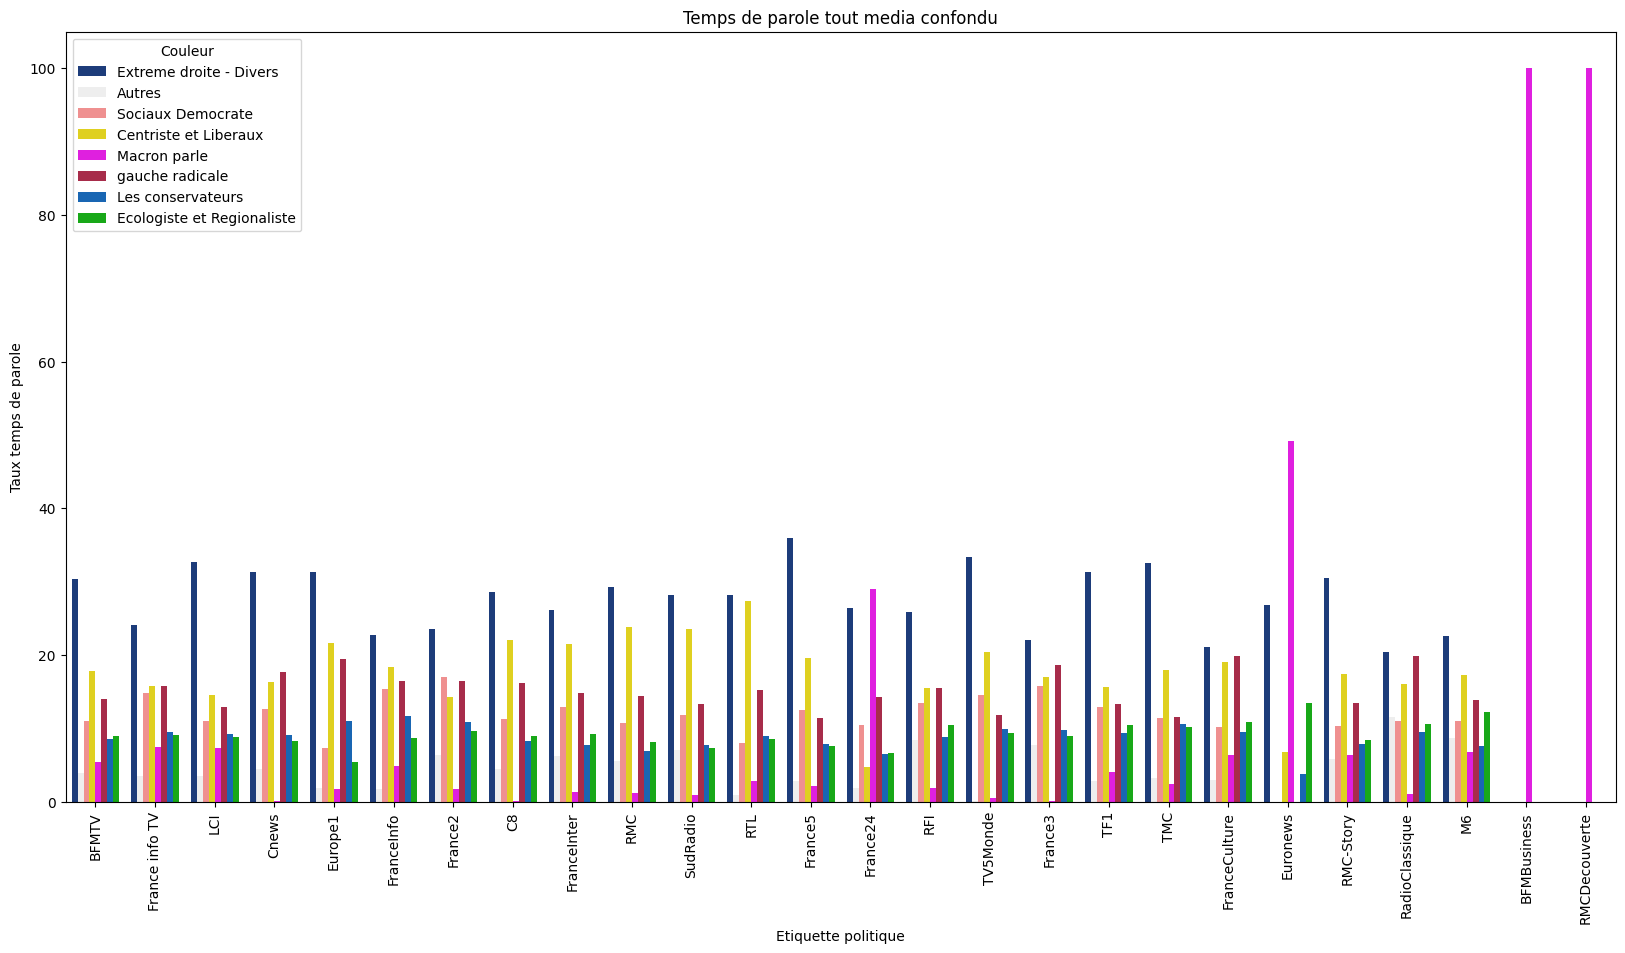

In [11]:
# preparation data
eu2024_sort = eu2024.sort_values(by="Temps total",ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs

# figure 
fig,ax =plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=eu2024_sort,x='Nom du media',y='Taux temps de parole',hue='Couleur',palette=colors,errorbar=None,estimator='sum')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show()

In [12]:
eu2024

,Listes candidates,Total période (durée),Nom du media,Type de media,Durée en seconde,Durée en minute,Temps total,Couleur,Taux temps de parole,Durée en heure
0,temps_president,00:04:30,BFMBusiness,radio,270,4.500000,270,Macron parle,100.000000,0.075000
1,ALLIANCE RURALE,00:20:23,BFMTV,TV info continue,1223,20.383333,159919,Autres,0.764762,0.339722
2,BESOIN D?EUROPE,07:55:17,BFMTV,TV info continue,28517,475.283333,159919,Centriste et Liberaux,17.832153,7.921389
3,CHANGER L?EUROPE,00:19:42,BFMTV,TV info continue,1182,19.700000,159919,Sociaux Democrate,0.739124,0.328333
4,DEFENDRE LES ENFANTS,00:02:05,BFMTV,TV info continue,125,2.083333,159919,Autres,0.078165,0.034722
...,...,...,...,...,...,...,...,...,...,...
706,POUR UNE AUTRE EUROPE,00:01:34,France info TV,TV info continue,94,1.566667,128677,Autres,0.073051,0.026111
707,POUR UNE DEMOCRATIE REELLE: DECIDONS NOUS-MEMES!,00:02:22,France info TV,TV info continue,142,2.366667,128677,Autres,0.110354,0.039444
708,POUR UNE HUMANITE SOUVERAINE,00:00:21,France info TV,TV info continue,21,0.350000,128677,Autres,0.016320,0.005833
709,REVEILLER L?EUROPE,04:31:27,France info TV,TV info continue,16287,271.450000,128677,Sociaux Democrate,12.657274,4.524167


In [13]:
# Puis comparais aux resultats d'élection
# comparaison aussi avec les 5% de resultats voir si la couverture mediatique assure un financement de la campagne ou non.

# ensuite faire la meme chose avec les legislative youpi. et rajouter les regles de l arcom en source
 

In [ ]:
"""

Groupe CMA CGM Médias /Altice
BFM
BFMBUSINESS
RMC
Groupe Canal+ (Vivendi)
CNEWS
Groupe TF1
LCI
EUROPE1
Groupe France Médias Monde
FRANCE24
RFI
Groupe Radio France
FRANCEINTER
FRANCEINFO Radio
FRANCECULTURE
Groupe NextRadioTV (Altice)
BFM
BFMBUSINESS
RMC
Groupe Lagardère
EUROPE1
RADIOCLASSIQUE (Note: Radio Classique appartient au Groupe Les Echos-Le Parisien, qui fait partie de LVMH, mais est souvent associée au groupe Lagardère pour ses collaborations et proximités éditoriales)
Autres
FRANCEINFO (France Télévisions)
EURONEWS (Consortium de médias européens, avec NBC News comme actionnaire majoritaire)
RTL (Groupe M6, qui est en cours de rapprochement avec le Groupe TF1)
SUDRADIO (Groupe Fiducial Médias)
"""